# Market research on restaurants in LA

The project is about market research before opening a small robot-run cafe in Los Angeles. 

Investors are interested in the current market conditions — will the new establishment be able to maintain success when the novelty of robot waiters wears off?

We have open-source data on restaurants in LA.

We need to investigate the data provided and make recommendations on restaurant type and number of seats as well as comment on the possibility of developing a chain.

# Step 1. Download the data and prepare it for analysis

In [2]:
# Loading all the libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
try:
    rest_data = pd.read_csv('rest_data_us.csv', sep=';')
except:
    rest_data = pd.read_csv('/datasets/rest_data_us.csv')

## Description of the data

The `rest_data` table:

- **object_name**— establishment name

- **chain** — chain establishment (TRUE/FALSE)

- **object_type** — establishment type

- **address** — address

- **number** — number of seats


In [3]:
pd.options.display.max_colwidth = 100
rest_data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [4]:
rest_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


All data formats are correct.

There are 3 missed values in 'chain' column - there are 9000 rows id dataset, we can remove 3 rows as this amount is insignificant.

In [5]:
rest_data = rest_data.dropna()

# Get info on data

Let's check if there is any duplicates in data

In [6]:
print(rest_data.duplicated().sum())

0


No duplicates were identified

Let's check if there are any empty strings or zeros

In [7]:
rest_data[(rest_data.object_name == '')|(rest_data.address == '')|(rest_data.object_type == '')|(rest_data.id == 0)|(rest_data.number == 0)]

,id,object_name,address,chain,object_type,number


There are no empty lines and zeros in the dataset.

In [8]:
rest_data.object_type.value_counts()

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64

There are 6 types of establishments with a great predominance of restaurants.

# Step 2. Data analysis

# Proportions of the various types of establishments

In [9]:
rest_by_object_type = rest_data.groupby('object_type').size().reset_index(name='count').sort_values(by='count',ascending=False)
rest_by_object_type

,object_type,count
5,Restaurant,7253
3,Fast Food,1066
2,Cafe,435
4,Pizza,319
1,Bar,292
0,Bakery,283


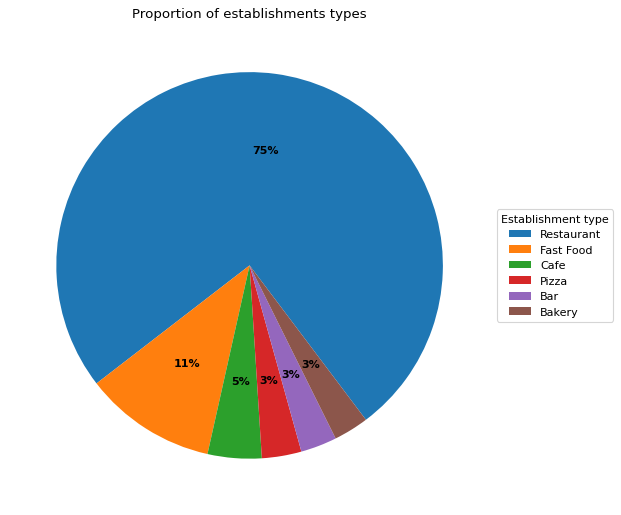

In [10]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"), dpi= 80)
number = rest_by_object_type['count']
categories = rest_by_object_type['object_type']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.0f}%".format(pct)

wedges, texts, autotexts = ax.pie(number, 
                                  autopct=lambda pct: func(pct, number),
                                  textprops=dict(color="k"), 
                                  startangle=-53)

# Decoration
ax.legend(wedges, categories, title='Establishment type', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title('Proportion of establishments types')
sns.set_palette('pastel')
plt.show()


Most common types of establishment are Restaurants and Fast Food.

# Proportions of chain and nonchain establishments

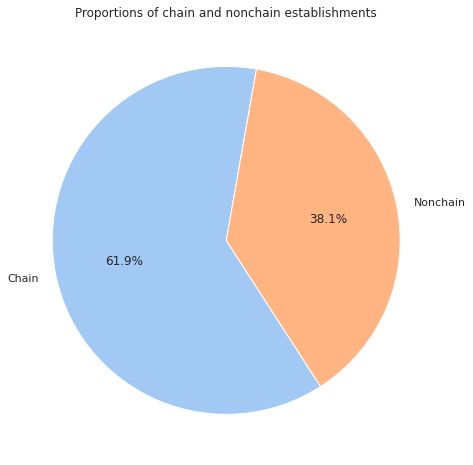

In [11]:
chain = rest_data.groupby('chain')['chain'].count()
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette('pastel')
labels = 'Chain', 'Nonchain'
fig1, ax1 = plt.subplots()
ax1.pie(chain, labels=labels, autopct='%1.1f%%', startangle=80)
plt.title('Proportions of chain and nonchain establishments')
plt.show()

Most part of establishments are Chains.

# Which type of establishment is typically a chain?

In [12]:
#grouping amount of chain and nonchain establishments and renaiming columns
types_chain = rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count').reset_index().\
rename(columns={False:'not_chains',True:'chains'})

#creating a column with total amount of establishments
types_chain['total'] = types_chain['chains'] + types_chain['not_chains']

#creating a column with chain proportion
types_chain['chains_share'] = types_chain['chains'] / types_chain['total']
types_chain = types_chain.sort_values(by='chains_share', ascending=False)
types_chain

chain,object_type,not_chains,chains,total,chains_share
2,Cafe,169.0,266.0,435.0,0.611494
3,Fast Food,461.0,605.0,1066.0,0.567542
4,Pizza,166.0,153.0,319.0,0.479624
5,Restaurant,4961.0,2292.0,7253.0,0.316007
1,Bar,215.0,77.0,292.0,0.263699
0,Bakery,NaN,283.0,NaN,NaN


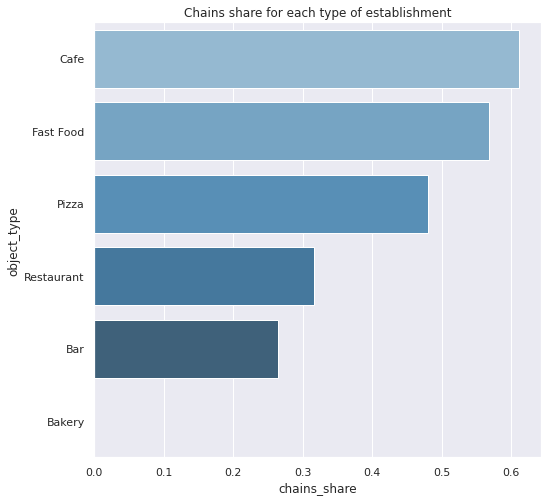

In [13]:
sns.barplot(y="object_type", x="chains_share", data=types_chain, palette="Blues_d")
plt.title('Chains share for each type of establishment')
plt.show()

The most popular type of chain establishment is Cafe, Fast food at the second place.

# Chains: number of seats or number of establishments?

Let's try to figure out what characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats.

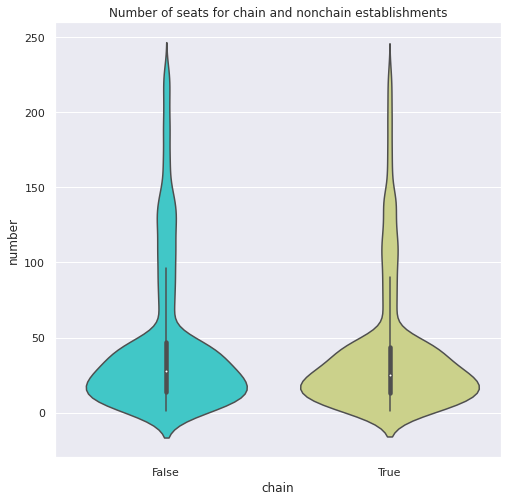

In [14]:
sns.violinplot(x="chain", y="number", data=rest_data, palette='rainbow')
plt.title('Number of seats for chain and nonchain establishments')
plt.show()

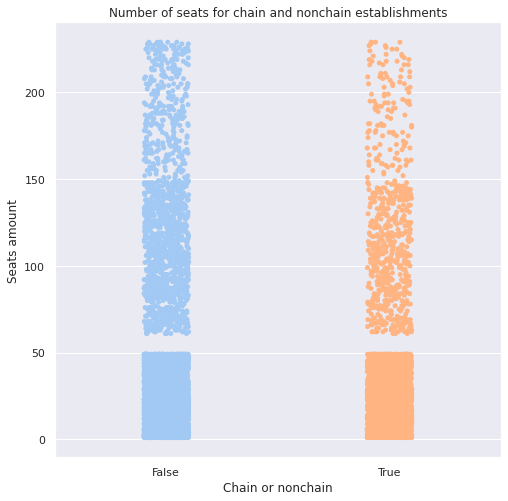

In [15]:
sns.stripplot(x="chain", y="number", data=rest_data)
plt.xlabel('Chain or nonchain')
plt.ylabel('Seats amount')
plt.title('Number of seats for chain and nonchain establishments')
plt.show()

We can conclude from the both plots that there is little difference between the two types of establishments in terms of seats amount. Most of them have about 50 seats, the smaller part of them have from 50 to 150 seats and very few have 200 seat and more.

# Average number of seats for each type of restaurant

Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [16]:
average_number = rest_data.pivot_table(index='object_type', values='number', aggfunc='mean').reset_index().sort_values(by='number', ascending=False)
average_number

,object_type,number
5,Restaurant,48.048807
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.545455
2,Cafe,25.000000
0,Bakery,21.773852


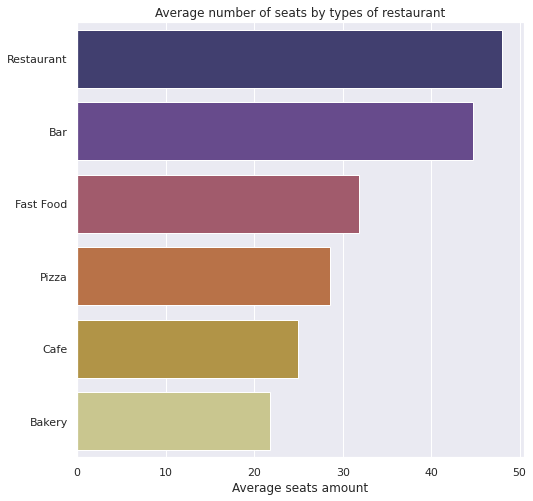

In [17]:
sns.barplot(y="object_type", x="number", data=average_number, palette="CMRmap", saturation=.5)
plt.xlabel('Average seats amount')
plt.ylabel('')
plt.title('Average number of seats by types of restaurant')
plt.show()

Restaurants and bars offer the largest number of seats, and the bakery offer the smallest number of seats (usually they more more focused on selling baked goods to go).

# Analysis of establishments by location

Let's put the data on street names in a separate column. We should exclude building, floor and apartment number from the full address (but not numbers contained in the street name). We'll create two lists: stop_after (contains words after which we should stop searching) and stop_before (with building number which is not to be in a new address column).

In [18]:
stop_after = ('AVE','AVENUE','BLVD','BROADWAY','CT','DR','DRIVE','HWY','LK','LN','PL','PLZ','RD','ST','WAY')
stop_before = ('BLDG','LVL','SHL','STE','UNIT')

def find_street(name):
    # clean-up before searching
    name = name.upper()
    name = name.split('#')[0]
    name = name.replace('ST ANDREWS','ST. ANDREWS')
    name = name.replace('CESAR CHAVEZ','CESAR E CHAVEZ')
    name = name.replace('WERSTERN','WESTERN')
    name = name.replace('ASTRONAUT ELLISON','ASTRONAUT E S')
    # finding a list of words, that don't contain only numbers
    x = re.findall("[0-9]*[A-Z']+[0-9]*\.?",name)
    street = []
    if x != []:
        for word in x:
            # checking if this word is in the stop_after list, if yes, stop checking next words
            if word.strip() in stop_after and x.index(word)>0:
                street.append(word.strip())
                return ' '.join(street).strip()
            # checking if this word is in the stop_before list, if yes, stop checking this and next words
            if word.strip() in stop_before:
                return ' '.join(street).strip()
            
            street.append(word.replace('.','').strip())
            
        return ' '.join(street).strip()

In [19]:
rest_data['street'] = rest_data.address.apply(find_street)
streets = rest_data.street.unique().tolist()
print('The list of streets consists of {} elements'.format(len(streets)))
rest_data.street.value_counts()[:10]

The list of streets consists of 724 elements


WILSHIRE BLVD        384
W SUNSET BLVD        369
W PICO BLVD          343
S WESTERN AVE        277
SANTA MONICA BLVD    262
HOLLYWOOD BLVD       242
W OLYMPIC BLVD       234
W 3RD ST             231
S FIGUEROA ST        228
W 6TH ST             214
Name: street, dtype: int64

Let's check if a street that does not have one of the endings from the stop_after list has a match that does have one of the endings in the streets list that already received. If there is, we'll change it to a name with this ending.
The second part concerns the streets, the names of which contain indications of the cardinal points. They are often just parts of the same street. This only applies to major streets like 'AVE', 'BLVD', 'HWY' and 'ST', but only if it does not contain a digit (3RD ST and W 3RD ST are different streets). If the street name, in which the first character indicates the cardinal points, is in the existing list of streets without cardinal directions, then I change the first to the second.

In [20]:
def has_number(name):
     return bool(re.search('\d', name))
    
card_points = ('W ','E ','N ','S ')   
big_streets = ('AVE','AVENUE','BLVD','BROADWAY','HWY','ST','WAY')

def clean_street(name):
    
    if not name.endswith(stop_after):
        for end in big_streets:
            if ' '.join([name,end]) in streets:
                name =  ' '.join([name,end])

    if name[:2] in card_points:
        if name.endswith(big_streets) and has_number(name) == False:
            guess = name[2:]
            if guess in rest_data.street.unique().tolist():
                return guess

    return name

In [21]:
rest_data.street = rest_data.street.apply(clean_street)
rest_data.street.value_counts()

SUNSET BLVD          404
WILSHIRE BLVD        398
PICO BLVD            371
WESTERN AVE          368
FIGUEROA ST          333
                    ... 
SHERMAN WAY            1
S BURLINGAME AVE       1
E OBSERVATORY AVE      1
S MC CLINTOCK AVE      1
PORTIA ST              1
Name: street, Length: 555, dtype: int64

Now we've got a list of 555 streets with various types of LA food service establishments.

Let's choose top 10 streets with the most establishments.

In [22]:
rest_by_street = rest_data.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False)
rest_by_street.set_axis(['street','number'],axis = 'columns',inplace = True)
rest_by_street.head(10)

,street,number
451,SUNSET BLVD,404
543,WILSHIRE BLVD,398
334,PICO BLVD,371
533,WESTERN AVE,368
149,FIGUEROA ST,333
320,OLYMPIC BLVD,309
473,VERMONT AVE,286
428,SANTA MONICA BLVD,264
179,HOLLYWOOD BLVD,254
487,W 3RD ST,231


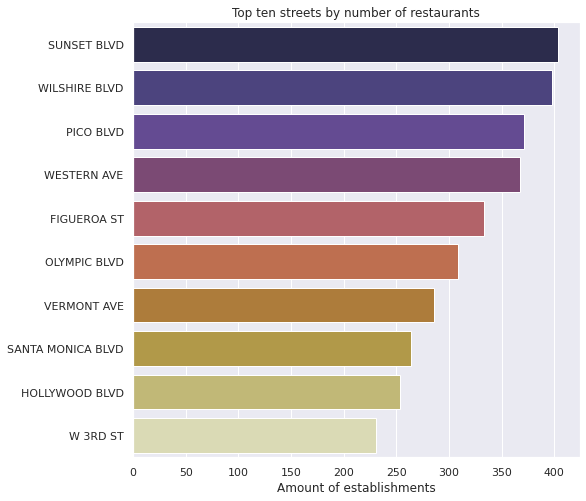

In [23]:
sns.barplot(y='street', x='number', data=rest_by_street.iloc[:10], palette="CMRmap", saturation=.5)
plt.xlabel('Amount of establishments')
plt.ylabel('')
plt.title('Top ten streets by number of restaurants')
plt.show()

Top 10 streets list contains mainly from huge avenues of LA.

Let's look at the dataframe with streets at which the only one establishment is situated.

In [24]:
street_only = rest_by_street.query('number == 1')
street_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 422 to 554
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  243 non-null    object
 1   number  243 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


There are 243 streets with the one establishment.

# For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

Let's create list with Top-10 streets in terms of establishments amount.

In [25]:
street_top = rest_by_street.iloc[:10,0].reset_index(drop=True)
street_top

0          SUNSET BLVD
1        WILSHIRE BLVD
2            PICO BLVD
3          WESTERN AVE
4          FIGUEROA ST
5         OLYMPIC BLVD
6          VERMONT AVE
7    SANTA MONICA BLVD
8       HOLLYWOOD BLVD
9             W 3RD ST
Name: street, dtype: object

In [26]:
street_top_list = []
for element in street_top:
    street_top_list.append(element)
street_top_list

['SUNSET BLVD',
 'WILSHIRE BLVD',
 'PICO BLVD',
 'WESTERN AVE',
 'FIGUEROA ST',
 'OLYMPIC BLVD',
 'VERMONT AVE',
 'SANTA MONICA BLVD',
 'HOLLYWOOD BLVD',
 'W 3RD ST']

In [27]:
data_street_top = rest_data.query('street == @street_top_list')
data_street_top.head()

,id,object_name,address,chain,object_type,number,street
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,SUNSET BLVD
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,WESTERN AVE
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,SUNSET BLVD


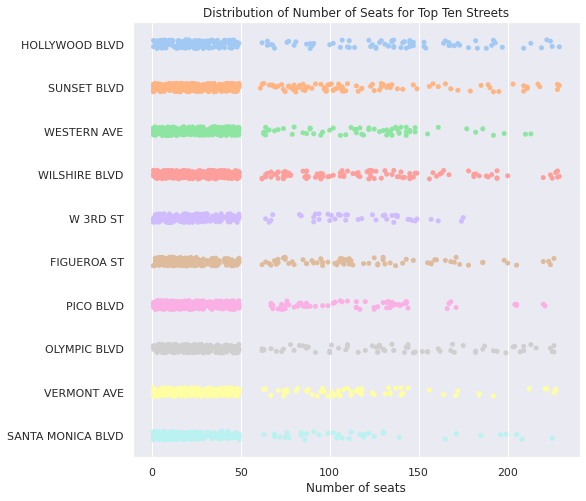

In [28]:
sns.stripplot(y="street", x="number", data=data_street_top)
plt.xlabel('Number of seats')
plt.ylabel('')
plt.title('Distribution of Number of Seats for Top Ten Streets')
plt.show()

There are less than 200 seats at the overwhelming majority of establishments situated at popular streets.

# Step 3. Presentation

Presentation link: <a>https://www.dropbox.com/s/5ydvyqckm5wvh0m/ROBOT-RUN%20CAF%C3%89%20MARKET%20RESEARCH.pdf?dl=0</a>

# Conclusion

1. The most popular types of establishments are restaurants (75%), fast food (11%) and cafe (5%). 
2. 62% of establishments belong to chain (most part of which are cafes and fast foods).
3. Both chain and nonchain establishments tend to open many relatively small restaurants.
4. Restaurants and bars offer the largest number of seats (between 40 and 50).
5. Establishment are concentrated near the key highways of LA.

Recomendations:


Cafe served by robots - an innovative format that can attract guests from all over the city. 

It seems that the demand for restaurants are satisfied (restaurants share is 75% of total amount of establishments). So it would be possible to recommend the creation of cafe or fast food.

Most part of cafes and fast foods in LA are chains. The format of the robot cafe suggests that the establishment is unique and will be presented in a single form. We should not exclude the possibility of scaling the business in the future, but at the moment it is a nonchain establishment.

The recommended number of seats is the average for the cafe and fast food format: from 25 to 32.

It makes sense to choose a location with convenient transport accessibility as well as in areas with established 'gastronomic clusters' (for example, the central sections of major highways).
